In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb

In [63]:
titanic = pd.read_csv('train.csv')
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic.drop('Cabin', axis=1, inplace=True)


In [55]:
titanic

,Survived,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,IsAlone
0,0,3,0,22.0,7.2500,False,True,0
1,1,1,1,38.0,71.2833,False,False,0
2,1,3,1,26.0,7.9250,False,True,1
3,1,1,1,35.0,53.1000,False,True,0
4,0,3,0,35.0,8.0500,False,True,1
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,13.0000,False,True,1
887,1,1,1,19.0,30.0000,False,True,1
888,0,3,1,28.0,23.4500,False,True,0
889,1,1,0,26.0,30.0000,False,False,1


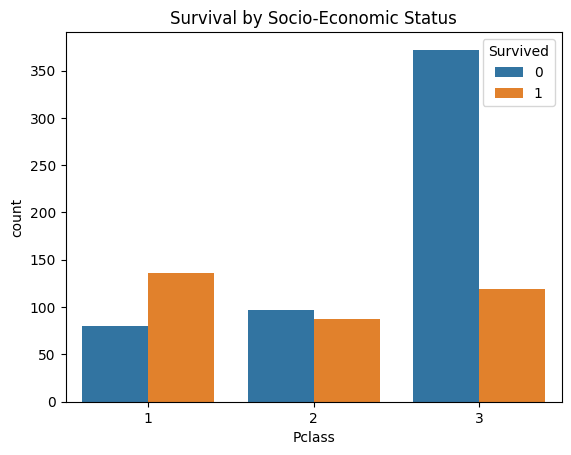

In [56]:
#Exploratory Data Analysis
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title('Survival by Socio-Economic Status')
plt.show()



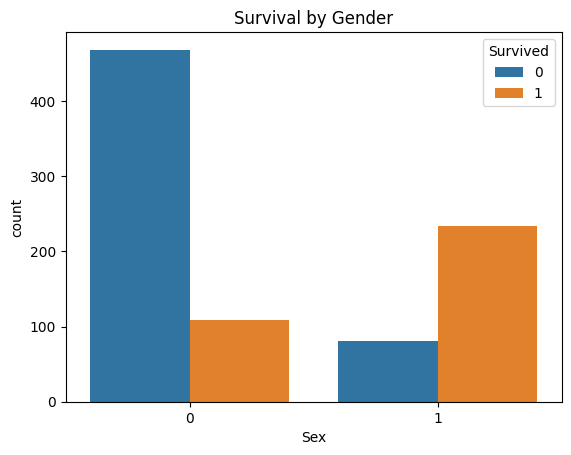

In [57]:
sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.title('Survival by Gender')
plt.show()



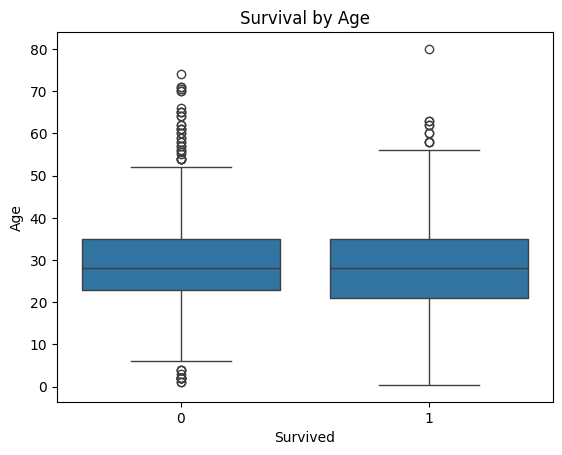

In [58]:
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.title('Survival by Age')
plt.show()


In [66]:
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic = pd.get_dummies(titanic, columns=['Embarked'], drop_first=True)

In [67]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


In [68]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']
titanic['IsAlone'] = np.where(titanic['FamilySize'] > 0, 0, 1)
titanic.drop(['SibSp', 'Parch', 'FamilySize'], axis=1, inplace=True)

In [69]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked_Q,Embarked_S,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,False,True,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,False,False,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,False,True,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,False,True,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,False,True,1


In [70]:
titanic.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [71]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,IsAlone
0,0,3,0,22.0,7.2500,False,True,0
1,1,1,1,38.0,71.2833,False,False,0
2,1,3,1,26.0,7.9250,False,True,1
3,1,1,1,35.0,53.1000,False,True,0
4,0,3,0,35.0,8.0500,False,True,1


In [72]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']


In [73]:
X

,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,IsAlone
0,3,0,22.0,7.2500,False,True,0
1,1,1,38.0,71.2833,False,False,0
2,3,1,26.0,7.9250,False,True,1
3,1,1,35.0,53.1000,False,True,0
4,3,0,35.0,8.0500,False,True,1
...,...,...,...,...,...,...,...
886,2,0,27.0,13.0000,False,True,1
887,1,1,19.0,30.0000,False,True,1
888,3,1,28.0,23.4500,False,True,0
889,1,0,26.0,30.0000,False,False,1


In [74]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
X_train

,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,IsAlone
331,1,0,45.5,28.5000,False,True,1
733,2,0,23.0,13.0000,False,True,1
382,3,0,32.0,7.9250,False,True,1
704,3,0,26.0,7.8542,False,True,0
813,3,1,6.0,31.2750,False,True,0
...,...,...,...,...,...,...,...
106,3,1,21.0,7.6500,False,True,1
270,1,0,28.0,31.0000,False,True,1
860,3,0,41.0,14.1083,False,True,0
435,1,1,14.0,120.0000,False,True,0


In [77]:
X_test

,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,IsAlone
709,3,0,28.0,15.2458,False,False,0
439,2,0,31.0,10.5000,False,True,1
840,3,0,20.0,7.9250,False,True,1
720,2,1,6.0,33.0000,False,True,0
39,3,1,14.0,11.2417,False,False,0
...,...,...,...,...,...,...,...
433,3,0,17.0,7.1250,False,True,1
773,3,0,28.0,7.2250,False,False,1
25,3,1,38.0,31.3875,False,True,0
84,2,1,17.0,10.5000,False,True,1


In [78]:
y_train

,Survived
331,0
733,0
382,0
704,0
813,0
...,...
106,1
270,0
860,0
435,1


In [79]:
y_test

,Survived
709,1
439,0
840,0
720,1
39,1
...,...
433,0
773,0
25,1
84,1


In [80]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
models = LogisticRegression(max_iter=1000)
models.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [85]:
y_train_pred=models.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {training_accuracy:.4f}")


Training Accuracy: 0.7921


In [86]:
y_train_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [87]:
training_accuracy

0.7921348314606742

In [88]:
y_test_pred=models.predict(X_test)
test_accuracy= accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.7989


In [89]:
test_accuracy

0.7988826815642458

In [90]:
importance = pd.DataFrame({'Feature': X.columns, 'Importance':models.coef_[0]})
importance = importance.sort_values(by='Importance', ascending=False)
importance


,Feature,Importance
1,Sex,1.218321
6,IsAlone,0.045268
3,Fare,0.021851
4,Embarked_Q,-0.045166
5,Embarked_S,-0.242622
2,Age,-0.326811
0,Pclass,-0.842995


In [91]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[88 17]
 [19 55]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [92]:
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgboost_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:05:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [93]:
y_test_pred_xgb = xgboost_model.predict(X_test)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
print(f"Test Accuracy with XGBoost: {test_accuracy_xgb:.4f}")

Test Accuracy with XGBoost: 0.8045


In [94]:
accuracy_df = pd.DataFrame({'Model': ['Logistic Regression', 'XGBoost'],
                            'Training Accuracy': [training_accuracy, training_accuracy],
                            'Test Accuracy': [test_accuracy, test_accuracy_xgb]})



In [95]:
training_accuracy

0.7921348314606742

In [97]:
accuracy_df.to_csv('training_accuracy.csv', index=False)